#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os  # cv2 : OpenCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [1]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = ',')
    plt.plot(history['val_loss'], label='val_err', marker = ',')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [6]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

* 이미지 확인하기

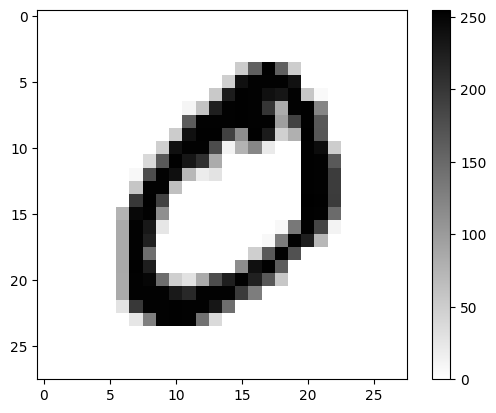

In [9]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

* 이미지를 픽셀 값(배열 값)으로 확인하기

In [12]:
# numpy array 화면 출력시 문자열 길이 조정
np.set_printoptions(linewidth=500)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60, 224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253, 253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,  84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,  28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,   0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,   0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,   0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,   0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85, 178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252, 252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252, 233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

* 여러 이미지 확인하기

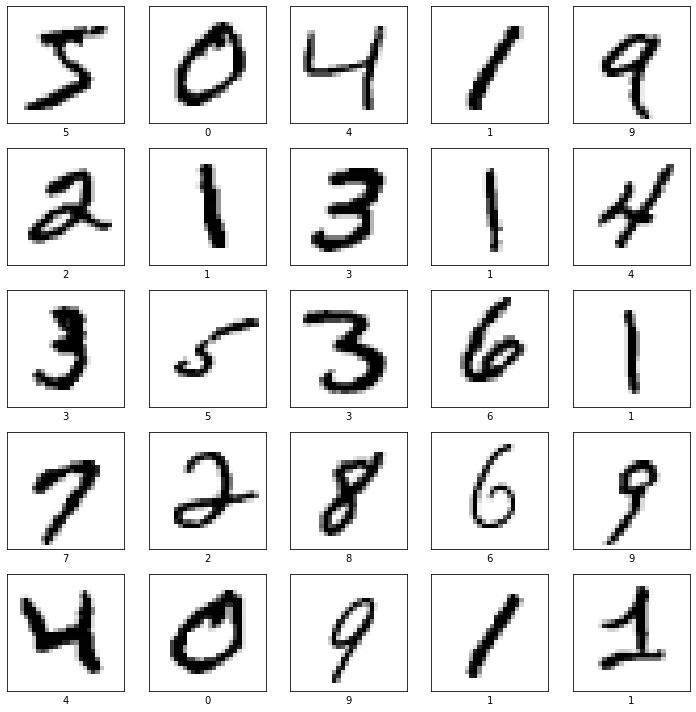

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [ ]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_val 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.CNN 기본 모델링

### (1) 모델 설계
* CNN 모델의 기본 구조
    * Conv2D  : 지역적인 특징 도출
    * MaxPooling : 요약
    * Flatten : 1차원으로 펼치기
    * Dense : Output Layer

In [ ]:
clear_session()

model = Sequential([Conv2D(16, kernel_size = 3, input_shape=(28, 28, 1),
                           padding='same', activation='relu'),  # strides = 1(기본값,1)
                    MaxPooling2D(pool_size = 2 ),             # strides = 2(기본값이 pool_size 동일)
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


### (2) 학습

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 12s 3ms/step - loss: 0.3140 - val_loss: 0.1565
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1296 - val_loss: 0.1049
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0901 - val_loss: 0.0854
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0713 - val_loss: 0.0755
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0588 - val_loss: 0.0697
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - val_loss: 0.0730
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0442 - val_loss: 0.0665
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0395 - val_loss: 0.0767
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0343 - val_loss: 0.0699
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.03

### (3) 학습결과 그래프

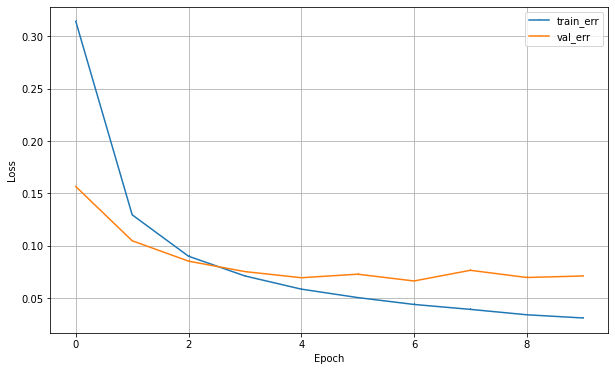

In [ ]:
dl_history_plot(history)

### (4) 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.982
------------------------------------------------------------
[[ 974    0    1    1    0    1    2    0    1    0]
 [   0 1131    1    2    0    0    1    0    0    0]
 [   5    3 1010    1    1    0    2    6    2    2]
 [   3    0    2  996    0    3    0    1    4    1]
 [   1    1    1    0  969    0    2    1    0    7]
 [   2    1    1    5    0  874    7    0    2    0]
 [   7    2    0    0    2    2  943    0    2    0]
 [   0    3   10    4    2    0    0 1003    2    4]
 [   6    0    4    1    3    2    5    3  945    5]
 [   5    3    0    4    9    4    0    7    2  975]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5    

## 5.실습


### (1) 모델1
* 기본 모델링에서 다음을 조정해 봅시다.
    * Flatten 이후 Dense 레이어 추가(노드수 128)

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [ ]:
x_train[0]

In [ ]:
clear_session()

model = Sequential([Conv2D(16, kernel_size=3, input_shape=(28, 28, 1), padding='same',
                           strides = 1, activation= 'relu'),
                    MaxPooling2D(pool_size=2, strides=2),
                    Flatten(),
                    Dense(128  , activation = 'relu' ),
                    Dense( 10 , activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 14s 3ms/step - loss: 0.1878 - val_loss: 0.0709
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0613 - val_loss: 0.0675
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0390 - val_loss: 0.0550
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0274 - val_loss: 0.0566
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0196 - val_loss: 0.0592
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0138 - val_loss: 0.0733
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0541
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0087 - val_loss: 0.0629
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0076 - val_loss: 0.0649
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.00

* 학습결과 그래프

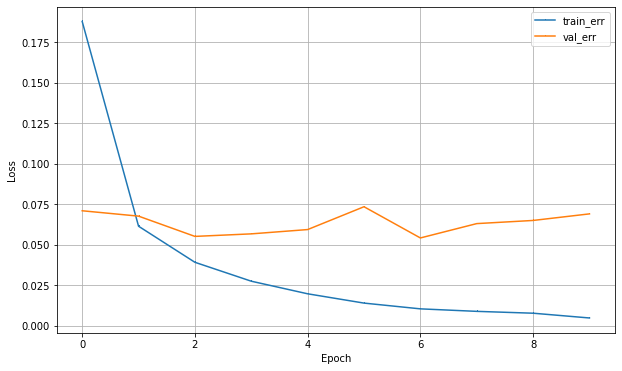

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 3ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9821
------------------------------------------------------------
[[ 976    1    0    1    0    0    1    0    1    0]
 [   0 1126    1    1    1    1    1    3    1    0]
 [   2   10  988    5    2    0    2   15    8    0]
 [   1    0    0  996    1   10    0    0    2    0]
 [   0    0    0    0  968    0    5    2    0    7]
 [   2    0    0    4    0  884    2    0    0    0]
 [   6    4    0    1    2    5  938    0    2    0]
 [   1    1    2    0    0    0    0 1019    2    3]
 [   4    1    0    0    1    8    2    3  951    4]
 [   2    5    0    0    9    7    0    7    4  975]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.99      0.99      1135
           2       1.00      0.96      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5   

### (2) 모델2
* 모델1에 이어서 다음을 조정해 봅시다.
    * Convnet의 커널 수를 32로 늘려 봅시다.

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, **32**) | 320       |
| max_pooling2d |  (None, 14, 14, 32) |      0         |
| flatten (Flatten) | (None, 6272)   |           0         |
| dense (Dense) |    (None, 128)   |            802944        |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [ ]:
clear_session()

model = Sequential([ Conv2D( 32, kernel_size = 3, input_shape =(28,28,1), padding='same',
                            activation= 'relu'),
                     MaxPooling2D(pool_size=2),
                     Flatten(),
                     Dense(128, activation = 'relu' ),
                     Dense(10, activation = 'softmax' )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1671 - val_loss: 0.0806
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0544 - val_loss: 0.0597
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0333 - val_loss: 0.0523
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0223 - val_loss: 0.0561
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0160 - val_loss: 0.0625
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0111 - val_loss: 0.0562
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0074 - val_loss: 0.0682
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0075 - val_loss: 0.0646
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0048 - val_loss: 0.0671
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.005

* 학습결과 그래프

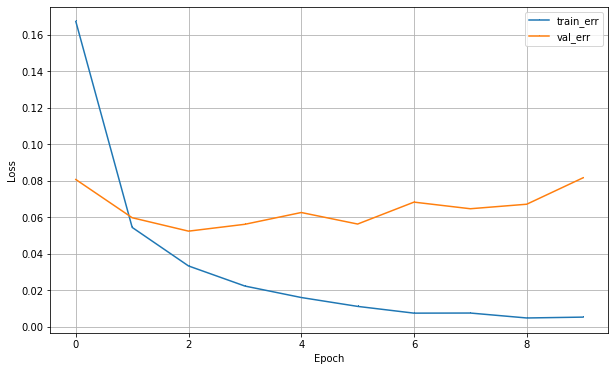

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9841
------------------------------------------------------------
[[ 975    0    1    1    0    0    3    0    0    0]
 [   0 1130    2    1    0    0    2    0    0    0]
 [   2    1 1023    3    0    0    0    3    0    0]
 [   0    0    0 1004    0    2    0    0    3    1]
 [   2    1    2    0  964    0    1    0    0   12]
 [   2    0    0   21    0  859    6    0    2    2]
 [   8    2    0    0    2    0  943    0    3    0]
 [   1    2   11    6    1    0    0  996    2    9]
 [   6    0    4    2    1    1    4    1  950    5]
 [   2    2    0    1    2    1    0    3    1  997]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5   

### (3) 모델3
* 모델2에 이어서, 아래 그림을 보고, 빠진 부분을 추가하시오.

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [ ]:
clear_session()

model = Sequential([ Conv2D(32, kernel_size=3, input_shape=(28,28,1),
                            padding='same', activation ='relu'), # strides = 1 기본값
                     MaxPooling2D(pool_size = 2),  # strides = pool_size 기본값
                     Conv2D(64, kernel_size = 3, padding='same', activation = 'relu'),
                     MaxPooling2D(pool_size = 2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1454 - val_loss: 0.0550
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0455 - val_loss: 0.0502
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0306 - val_loss: 0.0516
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0204 - val_loss: 0.0329
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0153 - val_loss: 0.0466
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0122 - val_loss: 0.0428
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0104 - val_loss: 0.0524
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0080 - val_loss: 0.0364
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0073 - val_loss: 0.0389
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.006

* 학습결과 그래프

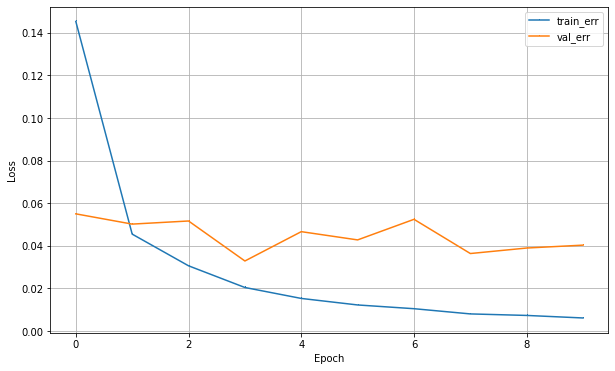

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9912
------------------------------------------------------------
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1125    0    2    2    0    3    1    2    0]
 [   1    1 1025    1    0    0    0    4    0    0]
 [   1    0    2  995    0   10    0    0    2    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   2    0    0    3    0  885    2    0    0    0]
 [   4    1    0    1    3    1  948    0    0    0]
 [   0    2    6    1    0    0    0 1017    1    1]
 [   2    0    1    0    1    1    1    0  967    1]
 [   1    0    1    1    6    4    0    2    2  992]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5   

## 6.틀린그림 찾아보기
* 모델3의 결과에서 틀린 그림을 살펴 봅시다.
* 아래코드는 이해하기보다는 그냥 사용하기 바랍니다.

In [ ]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(88, 28, 28)


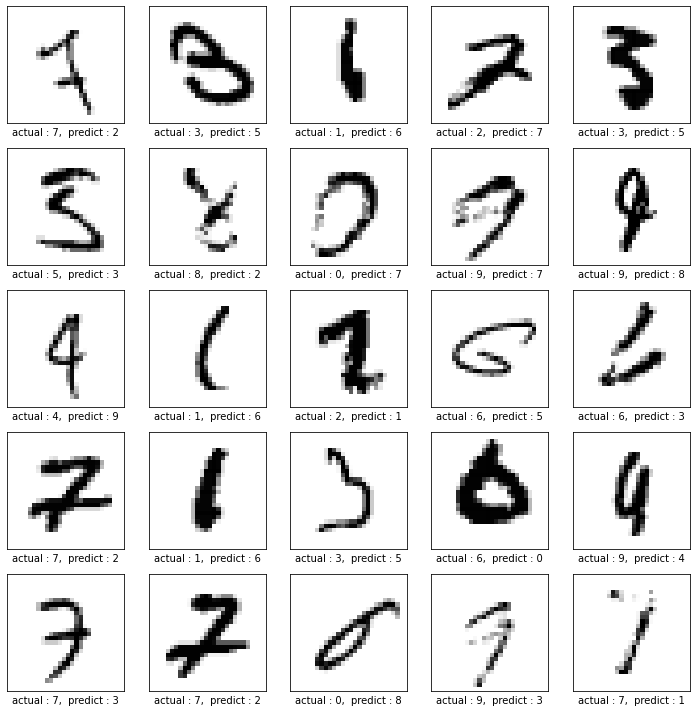

In [ ]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {y_temp[i]},  predict : {p_temp[i]}')
plt.tight_layout()
plt.show()

## 7.진짜 손글씨로 예측해 봅시다.

* 이미지 처리를 위한 라이브러리와 함수 불러오기

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 그린 손글씨를 업로드 합니다.

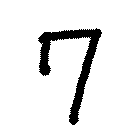

(140, 140)


In [ ]:
# 파일 열기
img = cv2.imread('07.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

* 이미지 크기를 28, 28, 1 로 맞추기

In [ ]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


* 예측하기

In [ ]:
# 입력데이터 형식을 갖추기
test_num = img.reshape(1,28,28,1)

# 예측하기
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(pred_1)

1/1 [==============================] - 0s 21ms/step
[7]
